In [39]:
import pandas as pd
import numpy as np
import timeit
%matplotlib inline
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

In [ ]:
def score(ypred, y):
    return 1 - sum((ypred - y)**2)/sum((np.mean(y) - y)**2)

In [ ]:
# Create artificial data
W = np.random.random(5)
W[0:-1] = W[0:-1]/sum(W[0:-1])
X = np.r_[np.random.random((len(W)-1,1000))]
X = np.r_[W[0]*np.ones((1,X.shape[1])), X]
Y = X.T.dot(W)
print(W)

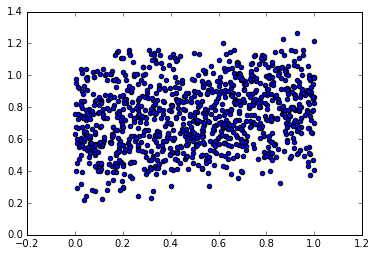

In [159]:
plt.scatter(X[1],Y)

In [160]:
def gradientDescent(x,y,w,alpha,numIterations):
    losses = [0]*numIterations
    for i in range(numIterations):
        error = x.T.dot(w) - y        
        gradient = 2 * x.dot(error)
        w = w - alpha * gradient 
        losses[i] = error.T.dot(error) / len(error) 
    return w, losses

[ 0.33795684  0.17129636  0.20470345  0.28604336  0.60814796]
[ 0.3379568   0.17129637  0.20470346  0.28604337  0.60814797]


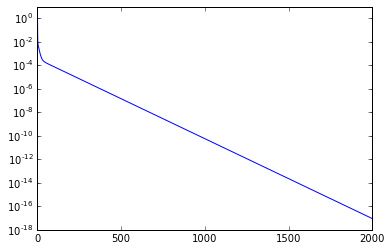

In [162]:
w0 = np.ones(W.shape)
alpha, numIterations = 0.0005, 2000
Wpred, Losses = gradientDescent(X,Y,w0,alpha,numIterations)
print(Wpred)
print(W)
plt.plot([i for i in range(numIterations)],Losses)
plt.yscale('log')

1.0


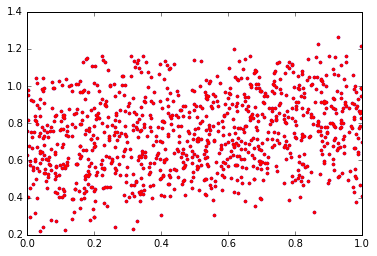

In [163]:
Ypred = X.T.dot(Wpred)
plt.plot(X[1],Y,'.',c='b')
plt.plot(X[1],Ypred,'.',c='r')
print(score(Ypred, Y))

In [169]:
## Using SciPy
from scipy.optimize import minimize

def res_squares(w, x, y):
    """ Sum of squared residuals """ 
    return sum((x.T.dot(w) - y)**2)

bnds = tuple([(0,None) for i in range(X.shape[0])])
cons = ({'type': 'eq','fun' : lambda W: np.array(sum(W[0:-1])-1)})

W0=np.ones(X.shape[0])/X.shape[0]

res = minimize(res_squares, W0, args=(X, Y), method='SLSQP',
               options={'disp': True}, constraints=cons, bounds=bnds) 

Wpred2 = res.x
print(Wpred2)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.914711337265599e-07
            Iterations: 10
            Function evaluations: 77
            Gradient evaluations: 10
[ 0.33793599  0.17128189  0.20468426  0.28609786  0.60814244]


0.999999993169


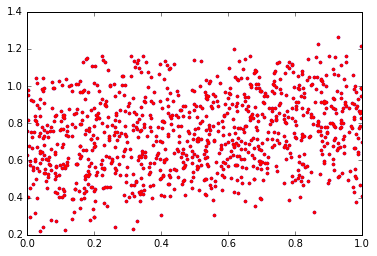

In [170]:
Ypred2 = X.T.dot(Wpred2)
plt.plot(X[1],Y,'.',c='b')
plt.plot(X[1],Ypred2,'.',c='r')
print(score(Ypred2, Y))